In [163]:
from statsmodels.formula.api import ols
from statsmodels.multivariate.pca import PCA
from main import *
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

In [164]:
import_by_country = pd.read_excel('temp_data.xls', header=0,index_col=0)
first_row =import_by_country.iloc[0].values
import_by_country = import_by_country[1:]
for i in range(len(first_row)):
    import_by_country.iloc[:,i] = import_by_country.iloc[:,i].div(first_row[i])
import_by_country

,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003
Austria,0.008692,0.006920,0.007120,0.007707,0.006214,0.006575,0.005713,0.004660,0.004248,0.004727,0.004448,0.005643,0.006125,0.005247,0.004494,0.004505,0.004975,0.004496
Italy,0.038369,0.036513,0.037093,0.040174,0.040935,0.040127,0.038487,0.037400,0.038012,0.041556,0.040977,0.044880,0.039183,0.040657,0.038449,0.038497,0.038217,0.040869
Ireland,0.017348,0.013712,0.015391,0.012559,0.031405,0.020950,0.011583,0.012989,0.013758,0.013524,0.008775,0.009988,0.006369,0.006501,0.007372,0.008158,0.009041,0.007378
Estonia,0.000556,0.000532,0.000279,0.000282,0.000260,0.000226,0.000211,0.000210,0.000153,0.000184,0.000100,0.000078,0.000063,0.000064,0.000048,0.000047,0.000063,0.000050
Bulgaria,0.001594,0.001390,0.001201,0.001414,0.001383,0.001332,0.000858,0.000864,0.000778,0.000844,0.001024,0.000887,0.000798,0.001127,0.001005,0.001070,0.001123,0.001029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Other Countries,0.000000,0.000000,0.000000,0.000000,0.000002,0.000008,0.000006,0.000004,0.000001,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Australia,0.002361,0.003077,0.002273,0.002140,0.002808,0.002560,0.001728,0.001508,0.001808,0.002072,0.002154,0.003773,0.003689,0.002460,0.002287,0.002567,0.001792,0.003727
New Zealand,0.000201,0.000266,0.000180,0.000194,0.000187,0.000277,0.000147,0.000193,0.000127,0.000162,0.000272,0.000272,0.000334,0.000191,0.000190,0.000222,0.000198,0.000158
Papua New Guinea,0.000000,0.000000,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [165]:
import_by_country = get_eurozone_drop_members(import_by_country)
largest_partners = get_largest_import_partners(df=import_by_country, top_n_partners=12)

In [166]:
oecd_stats = pd.read_excel('oecd_cpi_stats.xlsx', engine='openpyxl', index_col=0, header=1)

In [167]:
largest_cpi_df = oecd_stats.loc[get_matching_index(oecd_stats, largest_partners)].transpose()

largest_cpi_df

Time,Japan,Switzerland,United Kingdom,USA,Euro area,China,India
Jan-2000,-0.9,1.585403,1.2,2.738892,1.9,-0.2,2.619048
Feb-2000,-0.6,1.623698,1.2,3.221884,2.0,0.7,3.614458
Mar-2000,-0.5,1.482930,1.0,3.757576,2.1,-0.2,4.830918
Apr-2000,-0.8,1.402478,0.9,3.068592,1.8,-0.3,5.542169
May-2000,-0.7,1.580529,1.0,3.188929,1.9,0.1,5.011933
...,...,...,...,...,...,...,...
Oct-2019,0.2,-0.253111,1.5,1.764043,0.7,3.8,7.615894
Nov-2019,0.5,-0.131189,1.5,2.051278,1.0,4.5,8.609271
Dec-2019,0.8,0.155766,1.4,2.285130,1.3,4.5,9.634551
Jan-2020,0.7,0.202291,1.8,2.486572,1.4,5.4,7.491857


In [168]:
scaled_features = StandardScaler().fit_transform(largest_cpi_df.values)
largest_cpi_df =  pd.DataFrame(scaled_features, index=largest_cpi_df.index, columns=largest_cpi_df.columns)

In [169]:
pca_cpi = PCA()
principalComponents_cpi = pca_cpi.fit_transform(largest_cpi_df)


In [170]:
components_cpi = pd.DataFrame(principalComponents_cpi, columns=['component_' + str(i) for i in range(1,8)], index=largest_cpi_df.index)
first_compnent = components_cpi['component_1']

In [171]:
def get_components_with_delay(component, range_num):
    result_df = pd.DataFrame()
    for i in range(range_num):
        result_df = pd.concat([result_df, component[i:].reset_index(drop=True)], axis=1, )
    result_df = result_df.dropna(axis=0)
    result_df.columns = ['component_'+str(i) for i in range(range_num)]
    result_df.index = component.index[range_num-1:]
    return result_df

components_with_delay = get_components_with_delay(component=first_compnent, range_num=12)

Text(0, 0.5, 'Explained variance (%)')

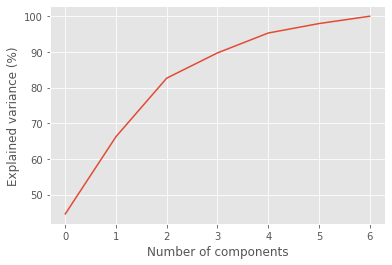

In [172]:
plt.plot(np.cumsum(pca_cpi.explained_variance_ratio_*100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance (%)')

In [173]:
israel_cpi = oecd_stats.loc['Israel'].astype('float64')
israel_cpi

Jan-2000    1.216216
Feb-2000    1.632653
Mar-2000    1.500682
Apr-2000    1.768708
May-2000    1.894452
              ...   
Oct-2019    0.398010
Nov-2019    0.299401
Dec-2019    0.600601
Jan-2020    0.300601
Feb-2020    0.100100
Name: Israel, Length: 242, dtype: float64

In [174]:
il_with_pca_df = pd.concat([israel_cpi, components_with_delay], axis=1, join='inner')
il_with_pca_df.head()

,Israel,component_0,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11
Dec-2000,0.000000,0.069084,0.510465,0.461073,-0.127038,0.198588,0.870711,0.889915,0.204668,0.688237,0.676354,1.279579,0.823199
Jan-2001,-0.133511,0.510465,0.461073,-0.127038,0.198588,0.870711,0.889915,0.204668,0.688237,0.676354,1.279579,0.823199,0.726491
Feb-2001,0.133869,0.461073,-0.127038,0.198588,0.870711,0.889915,0.204668,0.688237,0.676354,1.279579,0.823199,0.726491,0.175846
Mar-2001,0.672043,-0.127038,0.198588,0.870711,0.889915,0.204668,0.688237,0.676354,1.279579,0.823199,0.726491,0.175846,0.283139
Apr-2001,1.069519,0.198588,0.870711,0.889915,0.204668,0.688237,0.676354,1.279579,0.823199,0.726491,0.175846,0.283139,1.024759


In [175]:
results = ols('Israel ~ il_with_pca_df.drop(columns=[\'Israel\'])', data=il_with_pca_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Israel   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     4.307
Date:                Thu, 29 Jul 2021   Prob (F-statistic):           3.95e-06
Time:                        19:09:09   Log-Likelihood:                -461.55
No. Observations:                 231   AIC:                             949.1
Df Residuals:                     218   BIC:                             993.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                       1.5506      0.121     12.826      0.000       1.312       1.789
il_with_pca_df.drop(columns=['Israel'])[0]      0.5416      0.275      1.969      0.050      -0.000       1.084
il_with_pca_df.drop(columns=['Israel'])[1]     -0.2224      0.466     -0.477      0.634      -1.141       0.697
il_with_pca_df.drop(columns=['Israel'])[2]      0.0472      0.482      0.098      0.922      -0.904       0.998
il_with_pca_df.drop(columns=['Israel'])[3]      0.1308      0.479      0.273      0.785      -0.812       1.074
il_with_pca_df.drop(columns=['Israel'])[4]     -0.2811      0.481     -0.584      0.560      -1.230       0.668
il_with_pca_df.drop(columns=['Israel'])[5]      0.0033      0.495      0.007      0.995      -0.972       0.979
il_with_pca_df.drop(columns=['Israel'])[6]      0.0427      0.497      0.086      0.931      -0.936       1.021
il_with_pca_df.drop(columns=['Israel'])[7]     -0.1121      0.484     -0.231      0.817      -1.066       0.842
il_with_pca_df.drop(columns=['Israel'])[8]      0.0702      0.485      0.145      0.885      -0.885       1.026
il_with_pca_df.drop(columns=['Israel'])[9]     -0.0028      0.492     -0.006      0.996      -0.972       0.966
il_with_pca_df.drop(columns=['Israel'])[10]     0.0667      0.476      0.140      0.889      -0.871       1.004
il_with_pca_df.drop(columns=['Israel'])[11]     0.3493      0.279      1.251      0.212      -0.201       0.899
==============================================================================
Omnibus:                       21.743   Durbin-Watson:                   0.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.716
Skew:                           0.639   Prob(JB):                     5.81e-07
Kurtosis:                       4.162   Cond. No.                         37.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""